In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
from xhistogram.xarray import histogram
import glob
import seaborn as sns

CASE_NAME = 'california/'
BASE = '/scratch/ab10313/submeso_ML_data/'
PATH = BASE+CASE_NAME

PATH_SNAP = PATH+'snapshots/'
#os.mkdir(PATH_SNAP+'figures/')

lon = np.load(PATH_SNAP+'lon.npy')
lat = np.load(PATH_SNAP+'lat.npy')

#lon_lowres = np.load(PATH_SNAP+'lon_lowres.npy')
#lat_lowres = np.load(PATH_SNAP+'lat_lowres.npy')

In [22]:
# Load all datasets
PATH_PP = PATH+'preprocessed_data/'

# Load all datasets
PATH_PP = PATH+'preprocessed_data/'

# mesoscale fields
Bm_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_MLD_lowres.nc').rename('Bm_x_MLD_lowres')
Um_MLD_lowres = xr.open_dataarray(PATH_PP+'Um_MLD_lowres.nc').rename('Um_MLD_lowres')
Vm_MLD_lowres = xr.open_dataarray(PATH_PP+'Vm_MLD_lowres.nc').rename('Vm_MLD_lowres')
Wm_MLD_lowres = xr.open_dataarray(PATH_PP+'Wm_MLD_lowres.nc').rename('Wm_MLD_lowres')

# submesoscale fields
WsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'WsBs_MLD_lowres.nc').rename('WsBs_MLD_lowres')

# buoyancy gradients
Bm_x_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_x_MLD_lowres.nc').rename('Bm_x_MLD_lowres')
Bm_y_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_y_MLD_lowres.nc').rename('Bm_y_MLD_lowres')
Bm_z_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_z_MLD_lowres.nc').rename('Bm_z_MLD_lowres')

Bm_hor_grad = np.sqrt(Bm_x_MLD_lowres**2 + Bm_y_MLD_lowres**2).rename('Bm_hor_grad')


## Load 

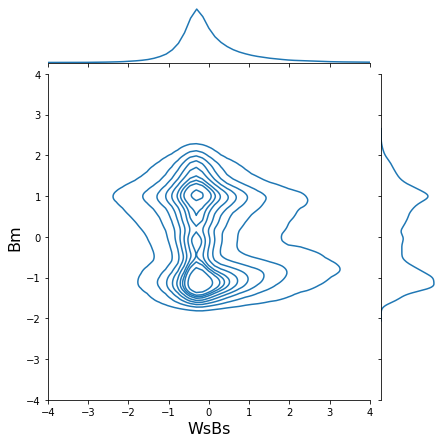

In [5]:
h= sns.jointplot(x=ds_WsBs.flatten(), y=ds_Bm.flatten(), kind='kde', xlim=[-4,4],ylim=[-4,4])
h.set_axis_labels('WsBs', 'Bm', fontsize=16)



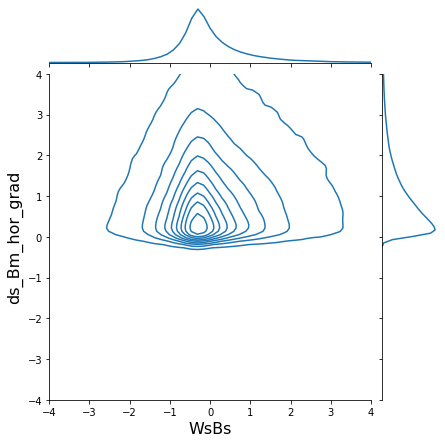

In [6]:
h= sns.jointplot(x=ds_WsBs.flatten(), y=ds_Bm_hor_grad.flatten(), kind='kde', xlim=[-4,4],ylim=[-4,4])
h.set_axis_labels('WsBs', 'ds_Bm_hor_grad', fontsize=16)

Text(0.5, 1.0, 'Conditioned on Um')

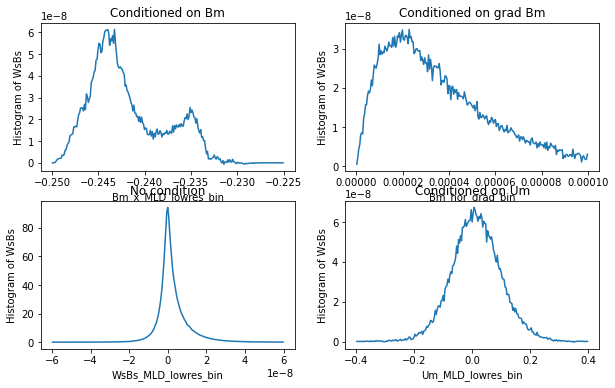

In [54]:
# spatial correlation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

plt.subplot(221)
b_band = np.linspace(-0.25, -0.225, 240)
Bm_WsBs_hist_cond = histogram(Bm_MLD_lowres  ,weights= WsBs_MLD_lowres,dim = ['lon','lat'],bins=[b_band])
Bm_WsBs_hist = histogram(Bm_MLD_lowres  ,dim = ['lon','lat'],bins=[b_band])
Bm_WsBs_hist_cond.mean('time').plot()
plt.ylabel('Histogram of WsBs')
plt.title('Conditioned on Bm')

plt.subplot(222)
grad_b_band = np.linspace(0, .1e-3, 240)
b_band = np.linspace(-0.25, -0.225, 240)
Bm_grad_WsBs_hist_cond = histogram(Bm_hor_grad ,weights= WsBs_MLD_lowres, dim = ['lon','lat'],bins=[grad_b_band])
Bm_grad_WsBs_hist_cond.mean('time').plot()
plt.ylabel('Histogram of WsBs')
plt.title('Conditioned on grad Bm')



plt.subplot(223)
wsbs_band = np.linspace(-.6e-7, .6e-7, 240)
WsBs_hist_cond = histogram(WsBs_MLD_lowres, dim = ['lon','lat'],bins=[wsbs_band])
WsBs_hist_cond.mean('time').plot()
plt.ylabel('Histogram of WsBs')
plt.title('No condition')


plt.subplot(224)
um_band = np.linspace(-.4, .4, 240)
Um_WsBs_hist_cond = histogram(Um_MLD_lowres  ,weights= WsBs_MLD_lowres, dim = ['lon','lat'],bins=[um_band])
Um_WsBs_hist_cond.mean('time').plot()
plt.ylabel('Histogram of WsBs')
plt.title('Conditioned on Um')

#Bm_WsBs_hist.mean('time').plot()


In [ ]:
#does this mean we get larger values of w'b'with conditioned on buoyancy, a little on grad B, neeed to check on other fields? 

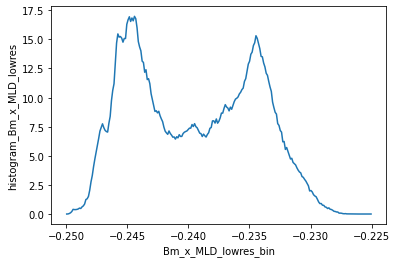

In [30]:
wsbs_band = np.linspace(-.2e-7, .2e-7, 240)
b_band = np.linspace(-0.25, -0.225, 240)
Bm_WsBs_hist = histogram(Bm_MLD_lowres  ,dim = ['lon','lat'],bins=[b_band])
Bm_WsBs_hist.mean('time').plot()

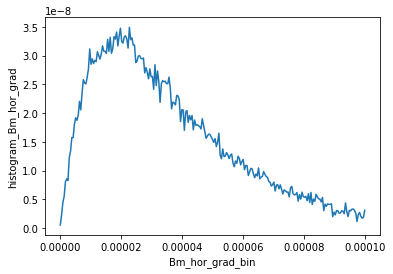

In [29]:
grad_b_band = np.linspace(0, .1e-3, 240)
b_band = np.linspace(-0.25, -0.225, 240)
Bm_WsBs_hist = histogram(Bm_hor_grad ,weights= WsBs_MLD_lowres, dim = ['lon','lat'],bins=[grad_b_band])
Bm_WsBs_hist.mean('time').plot()

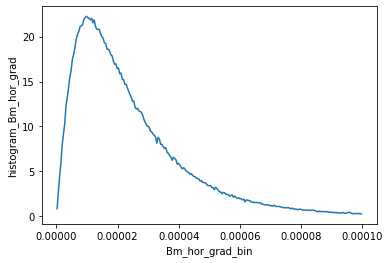

In [28]:
grad_b_band = np.linspace(0, .1e-3, 240)
b_band = np.linspace(-0.25, -0.225, 240)
Bm_WsBs_hist = histogram(Bm_hor_grad , dim = ['lon','lat'],bins=[grad_b_band])
Bm_WsBs_hist.mean('time').plot()

In [129]:
# average correlation
Bm_WsBs_corr = xr.corr(WsBs_MLD_lowres, Bm_MLD_lowres).values
Um_WsBs_corr = xr.corr(WsBs_MLD_lowres, Um_MLD_lowres).values
Vm_WsBs_corr = xr.corr(WsBs_MLD_lowres, Vm_MLD_lowres).values
Wm_WsBs_corr = xr.corr(WsBs_MLD_lowres, Wm_MLD_lowres).values

Bm_x_WsBs_corr = xr.corr(WsBs_MLD_lowres, Bm_x_MLD_lowres).values
Bm_y_WsBs_corr = xr.corr(WsBs_MLD_lowres, Bm_y_MLD_lowres).values
Bm_z_WsBs_corr = xr.corr(WsBs_MLD_lowres, Bm_z_MLD_lowres).values

corr_array = np.array([Bm_WsBs_corr, Um_WsBs_corr, Vm_WsBs_corr, Wm_WsBs_corr, Bm_x_WsBs_corr,
              Bm_y_WsBs_corr, Bm_z_WsBs_corr])
corr_vals = np.arange(-1,1,0.1)

corr_array_pos = np.array([Bm_WsBs_corr, Um_WsBs_corr, Vm_WsBs_corr, Wm_WsBs_corr, Bm_x_WsBs_corr,
              Bm_y_WsBs_corr, Bm_z_WsBs_corr])
corr_array_pos[corr_array<0] = np.nan
corr_array_neg = np.array([Bm_WsBs_corr, Um_WsBs_corr, Vm_WsBs_corr, Wm_WsBs_corr, Bm_x_WsBs_corr,
              Bm_y_WsBs_corr, Bm_z_WsBs_corr])
corr_array_neg[corr_array>0] = np.nan

In [130]:
corr_array

array([-0.13942443,  0.03897006,  0.01746953,  0.01883875,  0.0049416 ,
       -0.00314851,  0.15290524])

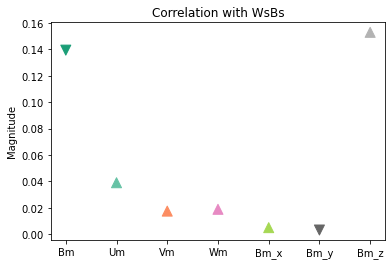

In [145]:
plt.scatter(np.arange(len(corr_array)), np.abs(corr_array_pos), marker='^', c=np.arange(len(corr_array)), s=100, cmap='Set2')
plt.scatter(np.arange(len(corr_array)), np.abs(corr_array_neg), marker='v', c=np.arange(len(corr_array)), s=100, cmap='Dark2')

plt.title('Correlation with WsBs')
plt.ylabel('Magnitude')
plt.xticks([0,1,2,3,4,5,6],['Bm','Um', 'Vm', 'Wm', 'Bm_x', 'Bm_y', 'Bm_z']);

array([False,  True,  True,  True,  True, False,  True])